Klassenbezeichnungen: ['malignant' 'benign']
Merkmalsnamen: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


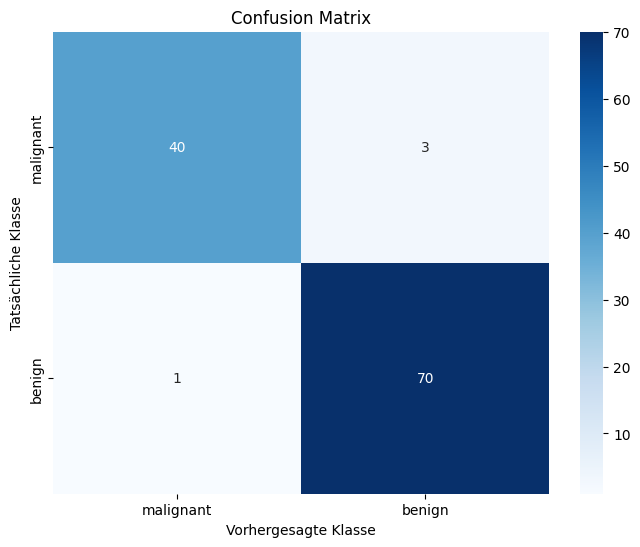


==================== Logistic Regression ====================
Genauigkeit: 0.9649122807017544
Klassifikationsbericht:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



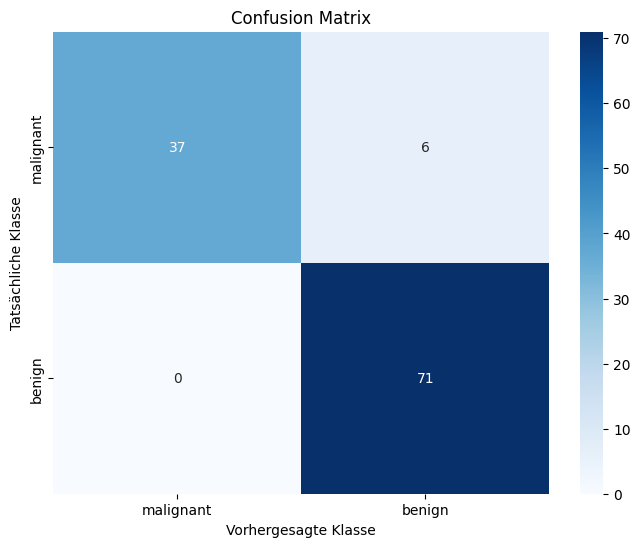


==================== Support Vector Machine ====================
Genauigkeit: 0.9473684210526315
Klassifikationsbericht:
              precision    recall  f1-score   support

   malignant       1.00      0.86      0.93        43
      benign       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



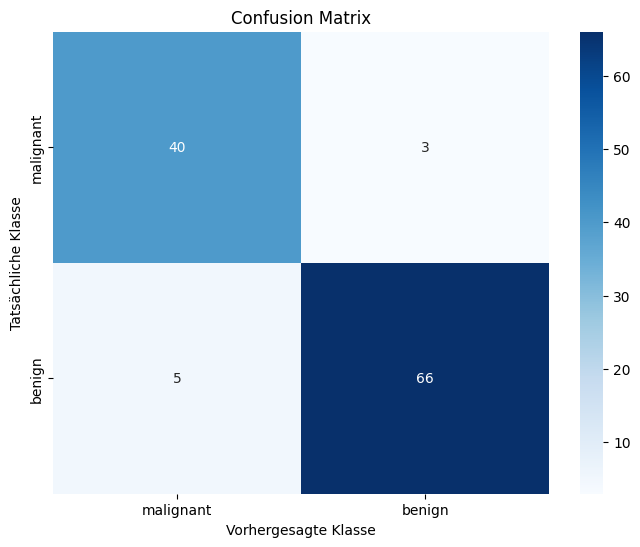


==================== Decision Tree ====================
Genauigkeit: 0.9298245614035088
Klassifikationsbericht:
              precision    recall  f1-score   support

   malignant       0.89      0.93      0.91        43
      benign       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



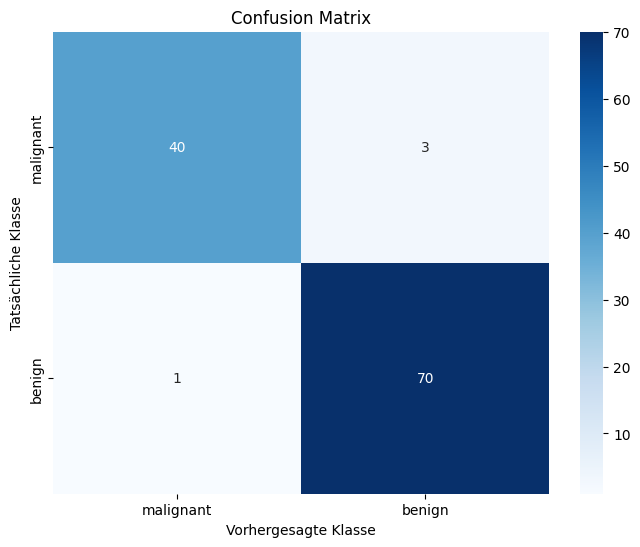


==================== Random Forest ====================
Genauigkeit: 0.9649122807017544
Klassifikationsbericht:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



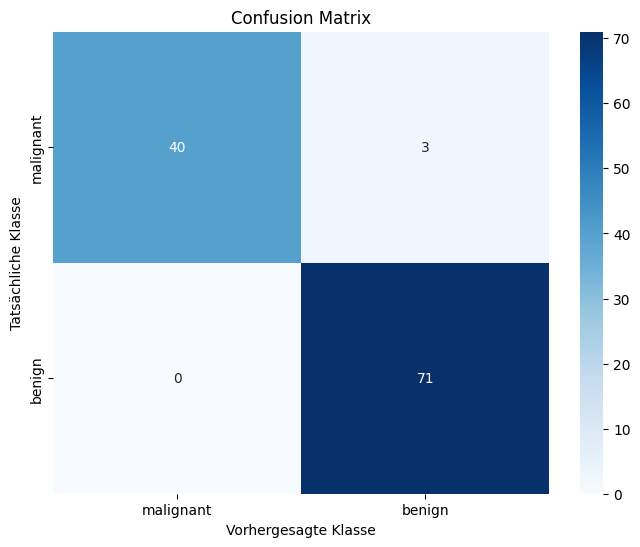


==================== Naive Bayes ====================
Genauigkeit: 0.9736842105263158
Klassifikationsbericht:
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

label_names = data["target_names"]
feature_names = data["feature_names"]
print("Klassenbezeichnungen:", label_names)
print("Merkmalsnamen:", feature_names)

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Vorhergesagte Klasse")
    plt.ylabel("Tatsächliche Klasse")
    plt.show()

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Modell trainieren
    y_pred = clf.predict(X_test)  # Vorhersagen treffen
    accuracy = accuracy_score(y_test, y_pred)  # Genauigkeit berechnen
    
    # Confusion Matrix berechnen
    cm = confusion_matrix(y_test, y_pred)
    
    # Confusion Matrix visualisieren
    plot_confusion_matrix(cm, label_names)
    
    # Klassifikationsbericht ausgeben
    report = classification_report(y_test, y_pred, target_names=label_names)
    
    # Genauigkeit und Klassifikationsbericht ausgeben
    print(f"\n{20*'='} {name} {20*'='}")
    print("Genauigkeit:", accuracy)
    print("Klassifikationsbericht:")
    print(report)


## Zusammenfassung der Ergebnisse für die Brustkrebsdiagnose

### Logistische Regression
- **Genauigkeit:** 96.49%
- Der Algorithmus erreicht eine hohe Genauigkeit von 96.49%. 
- Der F1-Score für die Malignant-Klasse beträgt 0.95 und für die Benign-Klasse 0.97.

### Support Vector Machine (SVM)
- **Genauigkeit:** 94.74%
- Der SVM-Algorithmus erreicht eine Genauigkeit von 94.74%. 
- Der F1-Score für die Malignant-Klasse beträgt 0.93 und für die Benign-Klasse 0.96.

### Entscheidungsbaum
- **Genauigkeit:** 92.98%
- Der Entscheidungsbaum erreicht eine Genauigkeit von 92.98%. 
- Der F1-Score für die Malignant-Klasse beträgt 0.91 und für die Benign-Klasse 0.94.

### Random Forest
- **Genauigkeit:** 96.49%
- Der Random Forest erreicht eine Genauigkeit von 96.49%. 
- Der F1-Score für die Malignant-Klasse beträgt 0.95 und für die Benign-Klasse 0.97.

### Naive Bayes
- **Genauigkeit:** 97.37%
- Der Naive Bayes Algorithmus erreicht eine hohe Genauigkeit von 97.37%. 
- Der F1-Score für die Malignant-Klasse beträgt 0.96 und für die Benign-Klasse 0.98.

Zusammenfassend zeigt der Naive Bayes Algorithmus die beste Leistung mit einer Genauigkeit von 97.37% und hohen F1-Scores für beide Klassen.

